In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


plt.style.use("ggplot")

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
homedepot = pd.read_csv(r'...\product_descriptions.csv')
homedepot.shape

(124428, 2)

In [3]:
homedepot = homedepot.dropna()
print(homedepot.shape)
homedepot.head()

(124428, 2)


,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [4]:
product_descriptions1 = homedepot.head(1000)
product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [5]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<1000x13688 sparse matrix of type '<class 'numpy.float64'>'
	with 70783 stored elements in Compressed Sparse Row format>

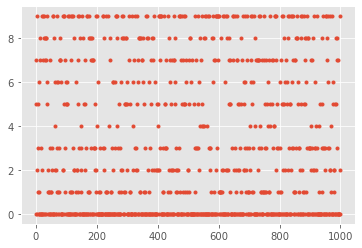

In [6]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [7]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind]),
    print

In [8]:
true_k = 50

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 garbage
 grind
 food
 waste
 steel
 feed
 septic
 disposal
 grinding
 mount
 disposals
 sink
 hp
 rpm
 motor
 provides
 magnet
 disposer
 power
 flowers
Cluster 1:
 epoxy
 garage
 formula
 gloss
 apply
 epoxyshield
 concrete
 hot
 towel
 oleum
 floor
 porcelain
 sq
 appealing
 tire
 chips
 roll
 handsome
 weeds
 coatings
Cluster 2:
 cycle
 wash
 washer
 cycles
 dryer
 clothes
 drum
 cu
 dry
 energy
 laundry
 time
 hook
 spin
 normal
 star
 steam
 drying
 wrinkle
 appliances
Cluster 3:
 bamboo
 shades
 natural
 blind
 size
 window
 fencing
 privacy
 brush
 warning
 room
 divider
 blinds
 mount
 roman
 panels
 cords
 outside
 order
 additional
Cluster 4:
 toilet
 flush
 bowl
 water
 flushing
 seat
 tank
 gpf
 toilets
 piece
 28
 round
 wax
 gal
 elongated
 performance
 height
 efficiency
 ring
 china
Cluster 5:
 drill
 11
 chuck
 m12
 m18
 tool
 48
 torque
 angle
 compact
 lithium
 cordless
 grinder
 pc
 motor
 life
 trigger
 corded
 battery
 ion
Cluste

In [9]:
lst = []
for i in range(true_k):
    for ind in order_centroids[i, :20]:
        lst.append(terms[ind])

cluster = []

for i in range(0,len(lst),20):
    cluster.append(lst[i:i+20])
df = pd.DataFrame(cluster[0])

for i in range (1,20):
    df[i] = cluster[i]
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,garbage,epoxy,cycle,bamboo,toilet,drill,various,window,door,tape,light,storage,spray,miter,gate,cutting,shower,air,mdf,door
1,grind,garage,wash,shades,flush,11,sizes,vinyl,doors,blanket,watt,shelves,kitchen,saw,gates,grass,water,cooling,moulding,garage
2,food,formula,washer,natural,bowl,chuck,materials,windows,wood,heater,lights,shelf,water,fence,stone,mower,showerhead,cool,casing,seal
3,waste,gloss,cycles,blind,water,m12,repair,film,slab,masking,bulbs,lbs,handle,blade,mule,mulch,tub,conditioner,painted,silicone
4,steel,apply,dryer,size,flushing,m18,information1,frame,steel,popcorn,outdoor,adjustable,spout,stops,mighty,engine,valve,unit,wainscot,leaks
5,feed,epoxyshield,clothes,window,seat,tool,angles,dog,style,adhesive,included,steel,adjustment,dust,stable,wheel,handle,room,fara,leakseal
6,septic,concrete,drum,fencing,tank,48,duct,home,glass,water,use,ft,faucet,cuts,pavestone,lawn,faucet,control,ft,tight
7,disposal,hot,cu,privacy,gpf,torque,altered,basement,interior,fiberglass,halogen,capacity,pull,bevel,fm135,deck,resist,temperature,architectural,clopay
8,grinding,towel,dry,brush,toilets,angle,projects,tafco,core,scotch,metal,heavy,temperature,stand,operator,wheels,easy,fan,rail,penetration
9,mount,oleum,energy,warning,piece,compact,joints,exterior,security,measuring,ft,duty,features,carbide,residential,yard,spout,timer,chair,pliers


In [10]:
df.to_csv(r'...\New.csv', index = False)

In [11]:
def show_recommendations(product):
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    print_cluster(prediction[0])

In [12]:
show_recommendations("cutting tool")

Cluster 15:
 cutting
 grass
 mower
 mulch
 engine
 wheel
 lawn
 deck
 wheels
 yard
 blade
 height
 play
 joe
 speed
 control
 bagging
 stratton
 features
 clippings


In [13]:
show_recommendations("spray paint")

Cluster 45:
 paint
 roller
 azek
 trim
 tray
 cortex
 ladder
 brush
 ladders
 project
 eliminates
 bracket
 finish
 ft
 smooth
 werner
 set
 cover
 plugs
 covers


In [14]:
show_recommendations("water")

Cluster 16:
 shower
 water
 showerhead
 tub
 valve
 handle
 faucet
 resist
 easy
 spout
 watersense
 moen
 finish
 bathroom
 spots
 single
 easily
 fingerprints
 brass
 makes
